<a href="https://colab.research.google.com/github/Divyansh-Bari/Sentiment-Analysis-using-RoBERTa/blob/main/Vader_vs_RoBERTa_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
# Read the data
df = pd.read_csv('/content/cleaned_tweets.csv')
df.head()

,Tweet_count,Username,Text,Created At,Retweets,Likes,cleaned_text
0,1,Jay in Kyiv,Russia's war now entirely aimed at the civilia...,Fri Feb 21 10:11:30 +0000 2025,2678,6854,russia war entirely aimed civilian population ...
1,2,LuxAlgo,🚨 TRADE WAR UPDATE 🚨\n\n🇺🇸 President Trump sai...,Sun Mar 30 19:27:46 +0000 2025,7,40,trade war update president trump said today ru...
2,3,ABC News,President Donald Trump says he's unhappy with ...,Mon Mar 31 19:17:07 +0000 2025,21,65,president donald trump say he unhappy russian ...
3,4,Anna_From_Ukraine_Official,"🚨 Putin wants war, not peace. While negotiatin...",Sat Mar 29 21:02:58 +0000 2025,262,988,putin want war peace negotiating white house h...
4,5,Economic Times,'#Putin will die soon…': #Zelenskyy’s shocking...,Thu Mar 27 16:35:00 +0000 2025,3,9,putin die soon zelenskyys shocking prediction ...


In [3]:
df['cleaned_text']

,cleaned_text
0,russia war entirely aimed civilian population ...
1,trade war update president trump said today ru...
2,president donald trump say he unhappy russian ...
3,putin want war peace negotiating white house h...
4,putin die soon zelenskyys shocking prediction ...
...,...
114,ukraine verge collapse russia ukraine losing a...
115,president trump said interview nbc news pissed...
116,new york time published long piece sunday admi...
117,backdrop report company around world already p...


In [4]:
df = df['cleaned_text']
df.head()

,cleaned_text
0,russia war entirely aimed civilian population ...
1,trade war update president trump said today ru...
2,president donald trump say he unhappy russian ...
3,putin want war peace negotiating white house h...
4,putin die soon zelenskyys shocking prediction ...


In [5]:
example = df[50]
example

'nuclear war alert nato member uk france officially announced plan deploy troop ukraine fight russia incredibly dangerous development mark biggest escalation year war watchshare live x stream'

In [6]:
tokens = nltk.word_tokenize(example)

In [7]:
tagged = nltk.pos_tag(tokens)

In [8]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  nuclear/JJ
  war/NN
  alert/NN
  nato/JJ
  member/NN
  uk/JJ
  france/NN
  officially/RB
  announced/VBD
  plan/NN
  deploy/VBP
  troop/JJ
  ukraine/JJ
  fight/NN
  russia/NN
  incredibly/RB
  dangerous/JJ
  development/NN
  mark/NN
  biggest/JJS
  escalation/NN
  year/NN
  war/NN
  watchshare/NN
  live/JJ
  x/NN
  stream/NN)


# **VADER Sentiment Scoring**

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [10]:
sia.polarity_scores('I am so happy that i cannot tell you!')

{'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'compound': 0.6468}

In [11]:
sia.polarity_scores('This is pretty unusual for me to think about it and i regret it!')

{'neg': 0.162, 'neu': 0.636, 'pos': 0.202, 'compound': 0.1759}

In [12]:
sia.polarity_scores('example')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [13]:
# Run the polarity score on the entire dataset
res = {}
for i in tqdm(df.index, total=len(df)):
    text = df.loc[i] # Access the text using the index
    # Since 'df' is now a Series, it doesn't have an 'id' column
    # If you need 'id', you should revert to the original DataFrame
    # or find a way to associate 'id' with your current 'df' Series
    # For now, I am using index 'i' as a key, assuming it aligns with ids
    # Replace with your logic to get 'myid' if different
    myid = i
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/119 [00:00<?, ?it/s]

In [14]:
vaders = pd.DataFrame(res).T
vaders = vaders.join(df, how='left')

In [15]:
vaders

,neg,neu,pos,compound,cleaned_text
0,0.157,0.843,0.000,-0.5994,russia war entirely aimed civilian population ...
1,0.188,0.712,0.100,-0.4767,trade war update president trump said today ru...
2,0.275,0.639,0.086,-0.7700,president donald trump say he unhappy russian ...
3,0.221,0.513,0.266,0.1027,putin want war peace negotiating white house h...
4,0.409,0.591,0.000,-0.8658,putin die soon zelenskyys shocking prediction ...
...,...,...,...,...,...
114,0.481,0.519,0.000,-0.9182,ukraine verge collapse russia ukraine losing a...
115,0.418,0.582,0.000,-0.9413,president trump said interview nbc news pissed...
116,0.218,0.782,0.000,-0.5994,new york time published long piece sunday admi...
117,0.190,0.731,0.079,-0.5849,backdrop report company around world already p...


# **RoBERTa Model**

In [16]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [17]:
from transformers import RobertaTokenizer

model = RobertaTokenizer.from_pretrained("FacebookAI/roberta-base")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [18]:
#from transformers import AutoTokenizer, RobertaModel
#import torch
#tokenizer = AutoTokenizer.from_pretrained("FacebookAI/roberta-base")
#model = RobertaModel.from_pretrained("FacebookAI/roberta-base")

In [19]:
# VADER results on example
print(example)
sia.polarity_scores(example)

nuclear war alert nato member uk france officially announced plan deploy troop ukraine fight russia incredibly dangerous development mark biggest escalation year war watchshare live x stream


{'neg': 0.373, 'neu': 0.568, 'pos': 0.059, 'compound': -0.9117}

In [20]:
# Run for roberta model
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

# Load pre-trained model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"  # Choose an appropriate sentiment analysis model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Run for RoBERTa Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}

print(scores_dict)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

{'roberta_neg': np.float32(0.5230496), 'roberta_neu': np.float32(0.4424479), 'roberta_pos': np.float32(0.034502484)}


In [21]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
    return scores_dict

In [28]:
res = {}
for i in tqdm(df.index, total=len(df)):
    text = df.loc[i]
    myid = i
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value

    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result_rename, **roberta_result}
    res[myid] = both


  0%|          | 0/119 [00:00<?, ?it/s]

In [26]:
both

{'vader_neg': 0.157,
 'vader_neu': 0.843,
 'vader_pos': 0.0,
 'vader_compound': -0.5994,
 'roberta_neg': np.float32(0.8263381),
 'roberta_neu': np.float32(0.16960916),
 'roberta_pos': np.float32(0.004052636)}

In [31]:
results_df = pd.DataFrame(res).T
results_df = results_df.join(df, how='left')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

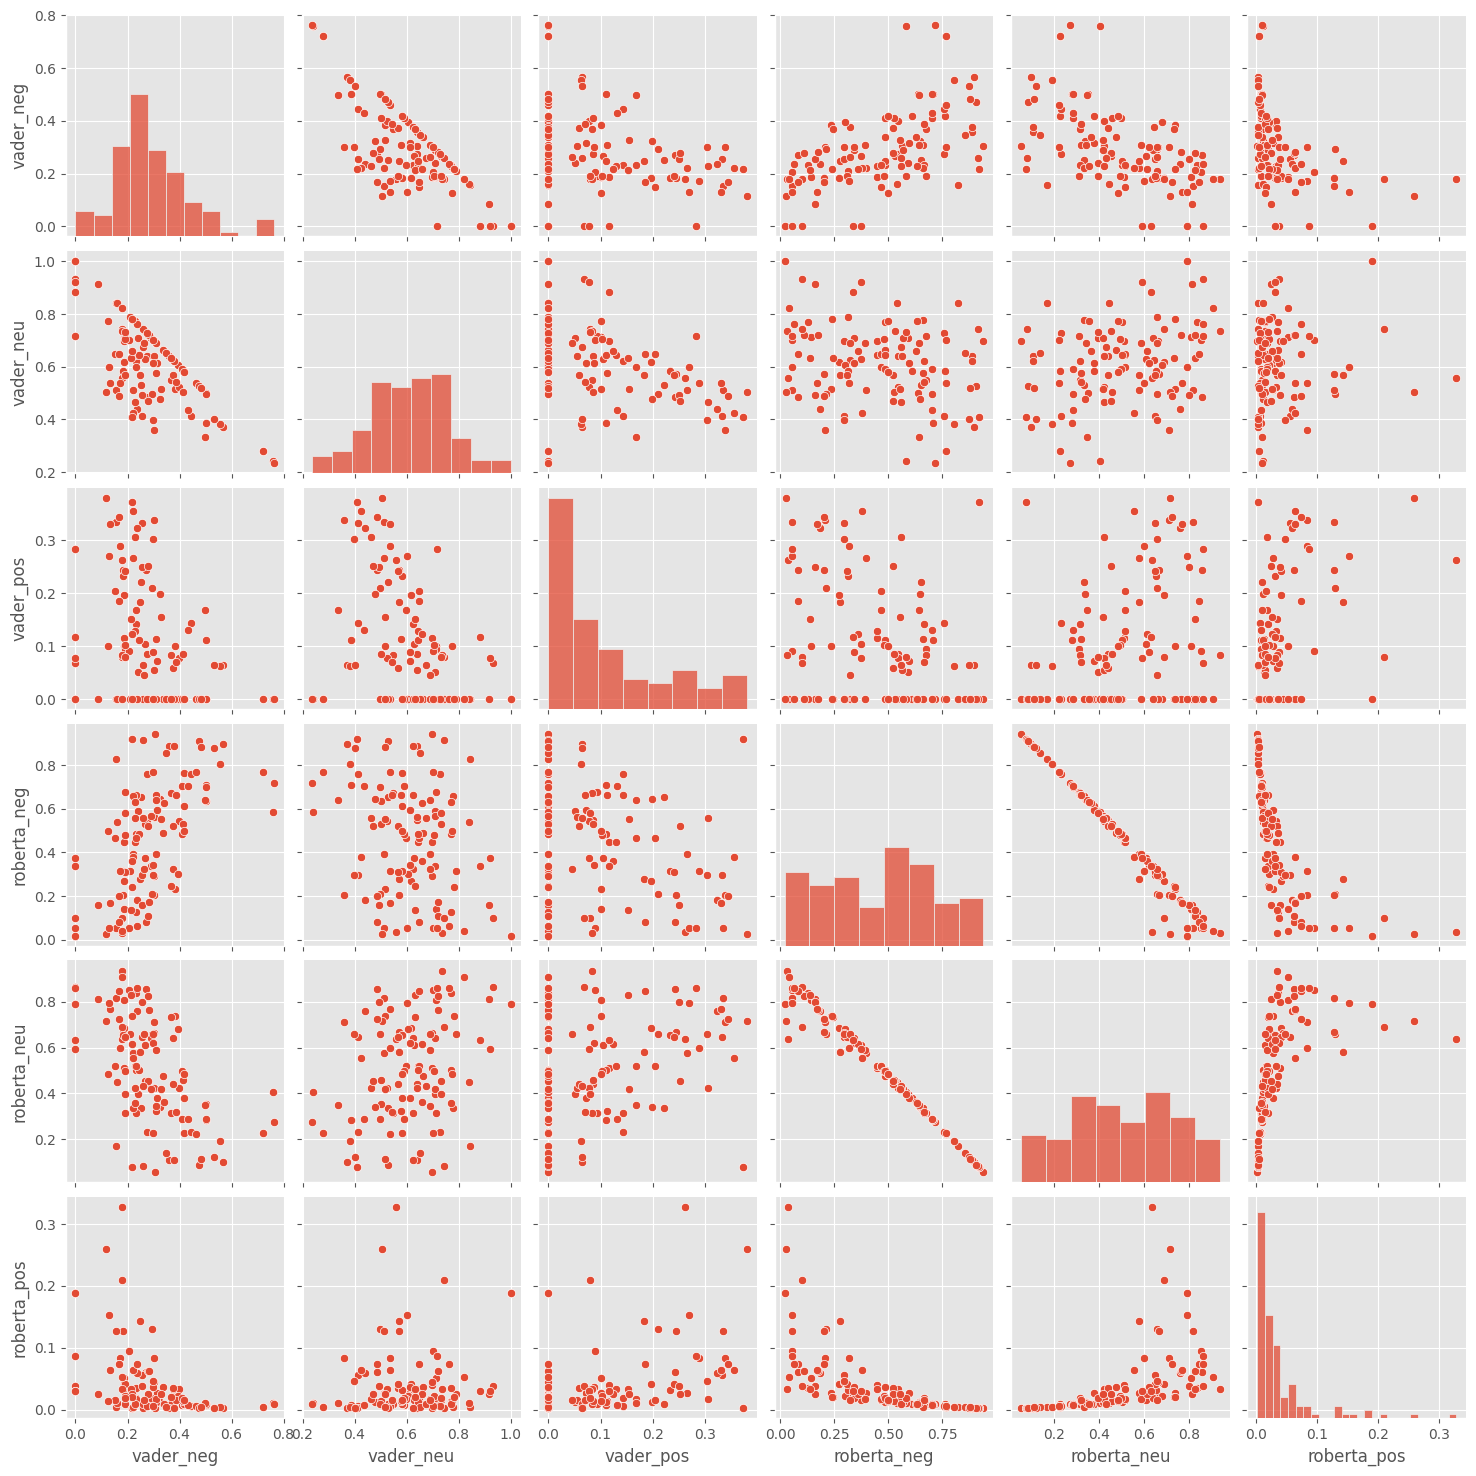

In [35]:
# Compare scores between models
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
             palette='tab10')

In [36]:
# Transformers Pipeline
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [37]:
sent_pipeline(example)

[{'label': 'NEGATIVE', 'score': 0.6946734189987183}]

In [39]:
from transformers import pipeline
import pandas as pd

# Load cleaned tweets dataset
df = pd.read_csv("/content/cleaned_tweets.csv")  # Change path if needed

# Load sentiment analysis pipeline
sent_pipeline = pipeline("sentiment-analysis")

# Run sentiment analysis on the cleaned_text column
results = sent_pipeline(df["cleaned_text"].tolist(), batch_size=16)

# Create a new DataFrame for the results
sentiment_df = pd.DataFrame({
    "cleaned_text": df["cleaned_text"],
    "label": [res["label"] for res in results],
    "score": [res["score"] for res in results]
})

# Preview
print(sentiment_df.head())

# Save the sentiment results to a new CSV
sentiment_df.to_csv("sentiment_results.csv", index=False)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


                                        cleaned_text     label     score
0  russia war entirely aimed civilian population ...  NEGATIVE  0.991356
1  trade war update president trump said today ru...  NEGATIVE  0.985862
2  president donald trump say he unhappy russian ...  NEGATIVE  0.997217
3  putin want war peace negotiating white house h...  NEGATIVE  0.977029
4  putin die soon zelenskyys shocking prediction ...  NEGATIVE  0.986666


In [40]:
sentiment_df.tail()

,cleaned_text,label,score
114,ukraine verge collapse russia ukraine losing a...,NEGATIVE,0.999296
115,president trump said interview nbc news pissed...,NEGATIVE,0.973365
116,new york time published long piece sunday admi...,NEGATIVE,0.791191
117,backdrop report company around world already p...,NEGATIVE,0.997695
118,flag country actively aiding russia brutal war...,POSITIVE,0.986585


In [41]:
# Count how many times each label appears
label_counts = sentiment_df['label'].value_counts()

# Display the count per label
print("Label Distribution:\n", label_counts)


Label Distribution:
 label
NEGATIVE    92
POSITIVE    27
Name: count, dtype: int64
